In [304]:
import matplotlib.pyplot as plt
import seaborn           as sns
import pandas            as pd
import numpy             as np

In [305]:
fontsize = 18

colors = ["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65", "#beb9db", "#8bd3c7"]

In [306]:
df = pd.read_csv("./grid_results_wtp.csv")
df

,n_workers,n_threads,n_partitions,load_time,rotation_time,mapping_time,compute_time,total_time
0,1,1,4,10.185622,0.026752,0.001295,10.913638,21.127812
1,1,2,4,6.194182,0.019727,0.001757,10.246067,16.461890
2,1,3,4,5.761245,0.019266,0.006701,9.618925,15.406607
3,1,4,4,5.683953,0.019071,0.000760,9.868846,15.573017
4,1,5,4,5.652280,0.019701,0.000728,9.864371,15.537254
...,...,...,...,...,...,...,...,...
59,8,4,32,5.820331,0.019974,0.001404,4.276159,10.118283
60,8,5,32,5.753138,0.019503,0.000681,3.999284,9.772907
61,8,6,32,5.621007,0.019570,0.001118,4.100616,9.743438
62,8,7,32,5.421969,0.018845,0.000675,4.131715,9.573660


In [307]:
df.describe()

,n_workers,n_threads,n_partitions,load_time,rotation_time,mapping_time,compute_time,total_time
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,4.500000,4.500000,18.000000,5.825178,0.019803,0.001023,4.995743,10.842166
std,2.309401,2.309401,9.237604,0.577786,0.001081,0.000823,1.987391,2.292432
min,1.000000,1.000000,4.000000,5.421969,0.018795,0.000482,3.622384,9.256394
25%,2.750000,2.750000,11.000000,5.640029,0.019360,0.000665,3.944677,9.684610
50%,4.500000,4.500000,18.000000,5.757191,0.019587,0.000737,4.127855,9.933819
75%,6.250000,6.250000,25.000000,5.870048,0.019951,0.001301,4.794180,10.666881
max,8.000000,8.000000,32.000000,10.185622,0.026752,0.006701,10.913638,21.127812


## Heatmaps

In [308]:
load_time_matrix     = df.pivot("n_workers", "n_threads", "load_time")
rotation_time_matrix = df.pivot("n_workers", "n_threads", "rotation_time")
mapping_time_matrix  = df.pivot("n_workers", "n_threads", "mapping_time")
compute_time_matrix  = df.pivot("n_workers", "n_threads", "compute_time")
total_time_matrix    = df.pivot("n_workers", "n_threads", "total_time")

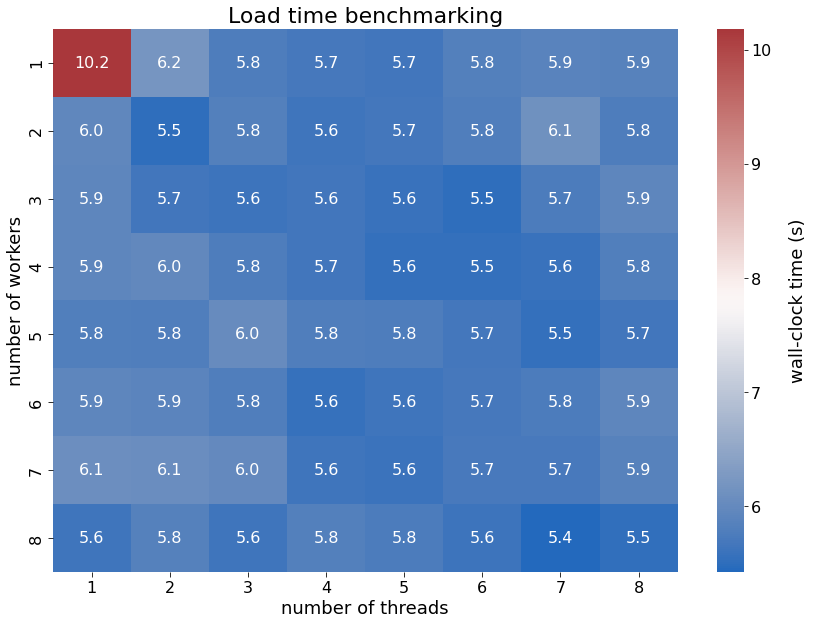

In [309]:
fig = plt.figure(figsize=(14,10))

ax = fig.add_subplot(1, 1, 1)

sns.heatmap(
    data      = load_time_matrix, 
    annot     = True, 
    annot_kws = {"fontsize": fontsize - 2},
    fmt       = ".1f",
    cbar      = True,
    cmap      = sns.color_palette("vlag", as_cmap=True),
    ax        = ax,
)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize = fontsize - 2)
cbar.ax.get_yaxis().labelpad = fontsize
cbar.ax.set_ylabel("wall-clock time (s)", fontsize = fontsize)

ax.set_title("Load time benchmarking", fontsize = fontsize + 4)
ax.set_xlabel("number of threads", fontsize = fontsize)
ax.set_ylabel("number of workers", fontsize = fontsize)
ax.tick_params(axis = "both", which = "major", labelsize = fontsize - 2, length=5)

fig.savefig("plots/heatmaps/load_time_wtp.png", facecolor="white", dpi=300)
plt.show()

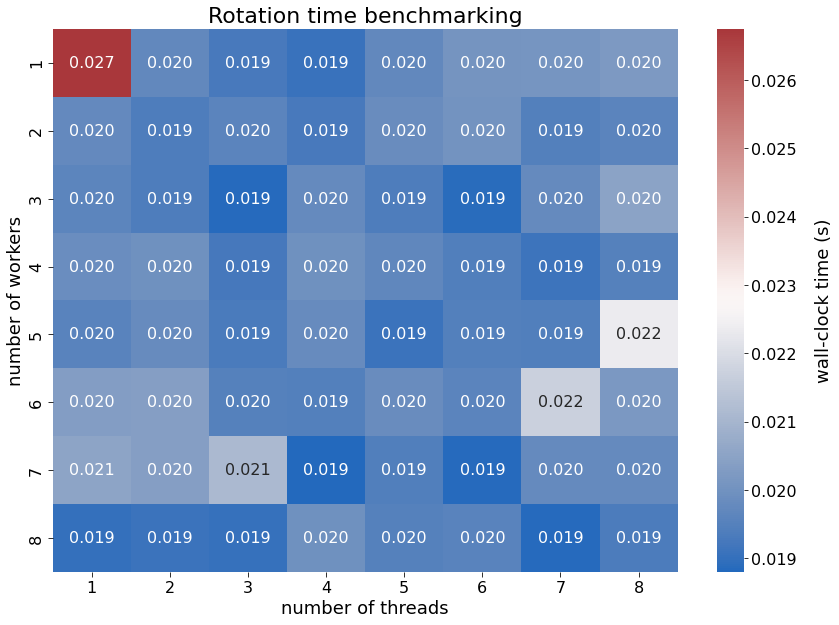

In [310]:
fig = plt.figure(figsize=(14,10))

ax = fig.add_subplot(1, 1, 1)

sns.heatmap(
    data      = rotation_time_matrix, 
    annot     = True, 
    annot_kws = {"fontsize": fontsize - 2},
    fmt       = ".3f",
    cbar      = True,
    cmap      = sns.color_palette("vlag", as_cmap=True),
    ax        = ax,
)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize = fontsize - 2)
cbar.ax.get_yaxis().labelpad = fontsize
cbar.ax.set_ylabel("wall-clock time (s)", fontsize = fontsize)

ax.set_title("Rotation time benchmarking", fontsize = fontsize + 4)
ax.set_xlabel("number of threads", fontsize = fontsize)
ax.set_ylabel("number of workers", fontsize = fontsize)
ax.tick_params(axis = "both", which = "major", labelsize = fontsize - 2, length=5)


fig.savefig("plots/heatmaps/rotation_time_wt.png", facecolor="white", dpi=300)
plt.show()

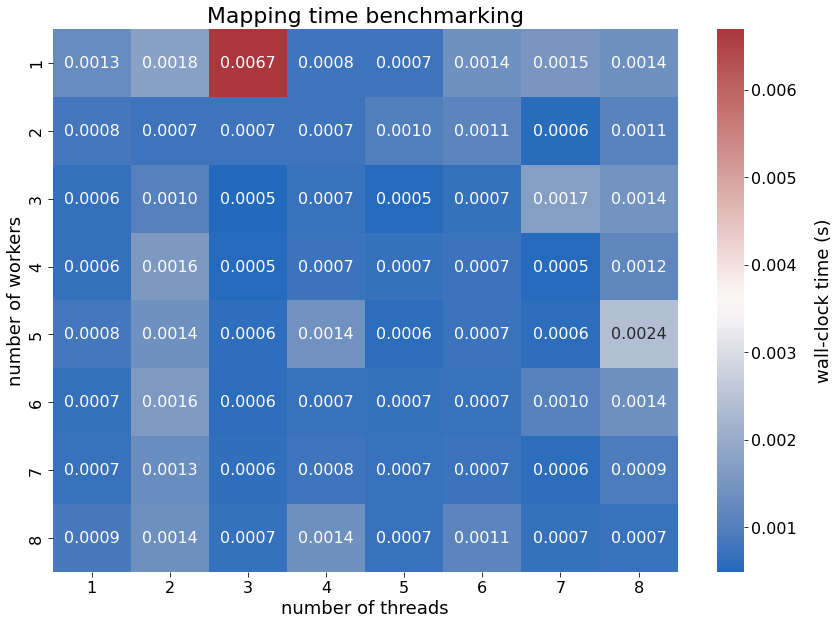

In [311]:
fig = plt.figure(figsize=(14,10))

ax = fig.add_subplot(1, 1, 1)

sns.heatmap(
    data      = mapping_time_matrix, 
    annot     = True, 
    annot_kws = {"fontsize": fontsize - 2},
    fmt       = ".4f",
    cbar      = True,
    cmap      = sns.color_palette("vlag", as_cmap=True),
    ax        = ax,
)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize = fontsize - 2)
cbar.ax.get_yaxis().labelpad = fontsize
cbar.ax.set_ylabel("wall-clock time (s)", fontsize = fontsize)

ax.set_title("Mapping time benchmarking", fontsize = fontsize + 4)
ax.set_xlabel("number of threads", fontsize = fontsize)
ax.set_ylabel("number of workers", fontsize = fontsize)
ax.tick_params(axis = "both", which = "major", labelsize = fontsize - 2, length=5)


fig.savefig("plots/heatmaps/mapping_time_wtp.png", facecolor="white", dpi=300)
plt.show()

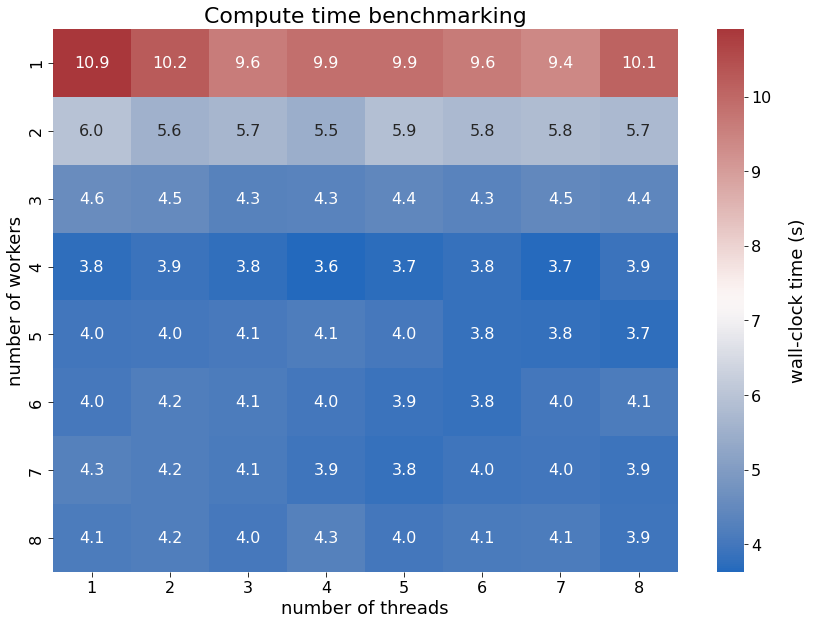

In [312]:
fig = plt.figure(figsize=(14,10))

ax = fig.add_subplot(1, 1, 1)

sns.heatmap(
    data      = compute_time_matrix, 
    annot     = True, 
    annot_kws = {"fontsize": fontsize - 2},
    fmt       = ".1f",
    cbar      = True,
    cmap      = sns.color_palette("vlag", as_cmap=True),
    ax        = ax,
)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize = fontsize - 2)
cbar.ax.get_yaxis().labelpad = fontsize
cbar.ax.set_ylabel("wall-clock time (s)", fontsize = fontsize)

ax.set_title("Compute time benchmarking", fontsize = fontsize + 4)
ax.set_xlabel("number of threads", fontsize = fontsize)
ax.set_ylabel("number of workers", fontsize = fontsize)
ax.tick_params(axis = "both", which = "major", labelsize = fontsize - 2, length=5)


fig.savefig("plots/heatmaps/compute_time_wtp.png", facecolor="white", dpi=300)
plt.show()

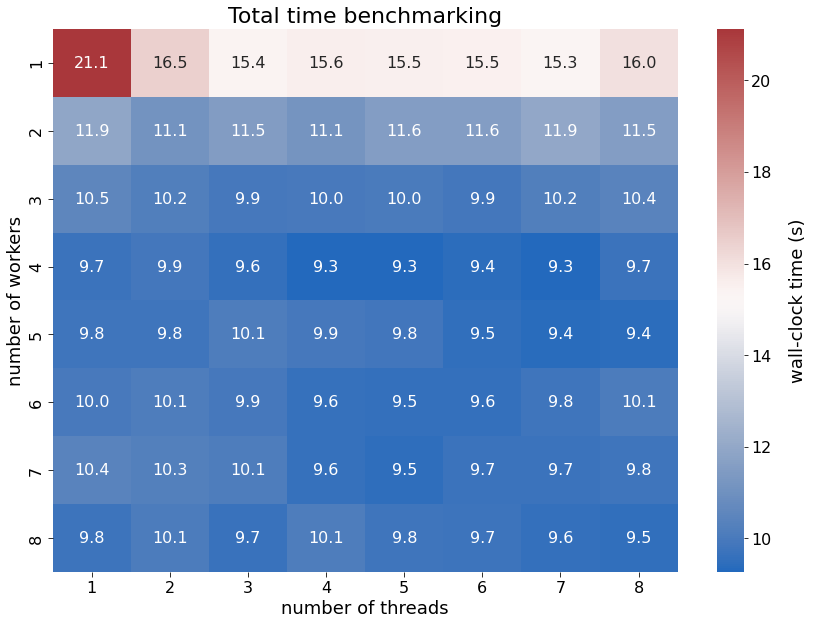

In [313]:
fig = plt.figure(figsize=(14,10))

ax = fig.add_subplot(1, 1, 1)

sns.heatmap(
    data      = total_time_matrix, 
    annot     = True, 
    annot_kws = {"fontsize": fontsize - 2},
    fmt       = ".1f",
    cbar      = True,
    cmap      = sns.color_palette("vlag", as_cmap=True),
    ax        = ax,
)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize = fontsize - 2)
cbar.ax.get_yaxis().labelpad = fontsize
cbar.ax.set_ylabel("wall-clock time (s)", fontsize = fontsize)

ax.set_title("Total time benchmarking", fontsize = fontsize + 4)
ax.set_xlabel("number of threads", fontsize = fontsize)
ax.set_ylabel("number of workers", fontsize = fontsize)
ax.tick_params(axis = "both", which = "major", labelsize = fontsize - 2, length=5)


fig.savefig("plots/heatmaps/total_time_wtp.png", facecolor="white", dpi=300)
plt.show()

## Trends

### Time vs threads

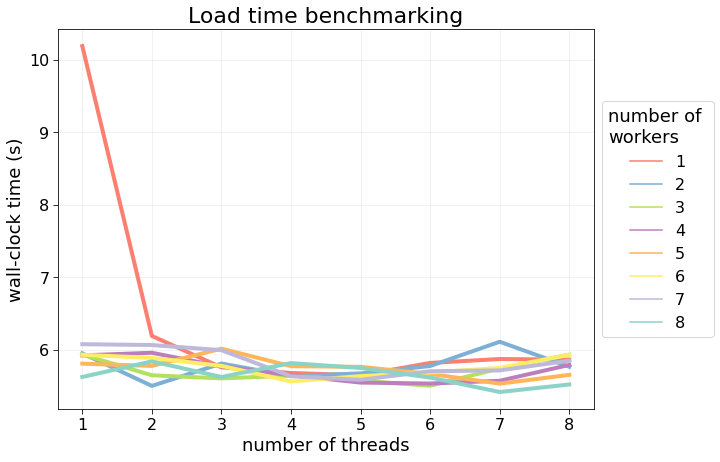

In [314]:
fig = plt.figure(figsize=(12,7))

ax = fig.add_subplot(1, 1, 1)
ax.grid(color = "black", alpha = 0.07)

sns.lineplot(
    data = df,
    x         = "n_threads",
    y         = "load_time",
    hue       = "n_workers",
    palette   = colors,
    linewidth = 4,
    ax        = ax,
    legend    = "full",
)
ax.set_title("Load time benchmarking", fontsize = fontsize + 4)
ax.set_xlabel("number of threads", fontsize = fontsize)
ax.set_ylabel("wall-clock time (s)", fontsize = fontsize)
ax.tick_params(axis = "both", which = "major", labelsize = fontsize - 2, length=5)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(title="number of \nworkers",loc="center left", bbox_to_anchor=(1, 0.5), fontsize = fontsize-2, title_fontsize=fontsize)


fig.savefig("plots/trends/load_time_wtp_ttrend.png", facecolor="white", dpi=300)
plt.show()

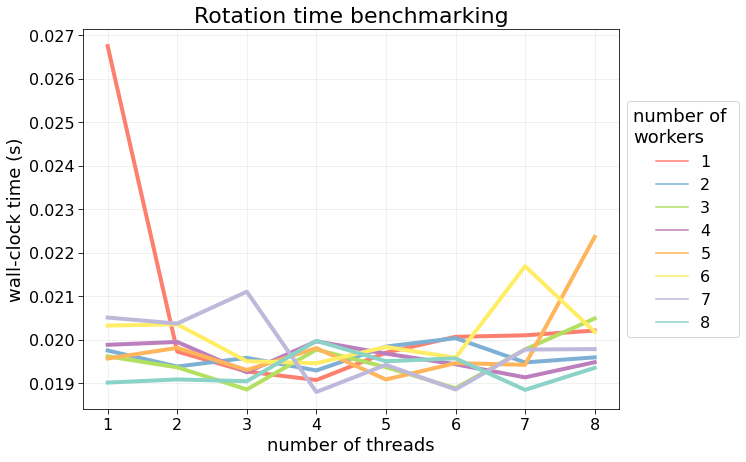

In [315]:
fig = plt.figure(figsize=(12,7))

ax = fig.add_subplot(1, 1, 1)
ax.grid(color = "black", alpha = 0.07)

sns.lineplot(
    data = df,
    x         = "n_threads",
    y         = "rotation_time",
    hue       = "n_workers",
    palette   = colors,
    linewidth = 4,
    ax        = ax,
    legend    = "full",
)
ax.set_title("Rotation time benchmarking", fontsize = fontsize + 4)
ax.set_xlabel("number of threads", fontsize = fontsize)
ax.set_ylabel("wall-clock time (s)", fontsize = fontsize)
ax.tick_params(axis = "both", which = "major", labelsize = fontsize - 2, length=5)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(title="number of \nworkers",loc="center left", bbox_to_anchor=(1, 0.5), fontsize = fontsize-2, title_fontsize=fontsize)


fig.savefig("plots/trends/rotation_time_wtp_ttrend.png", facecolor="white", dpi=300)
plt.show()

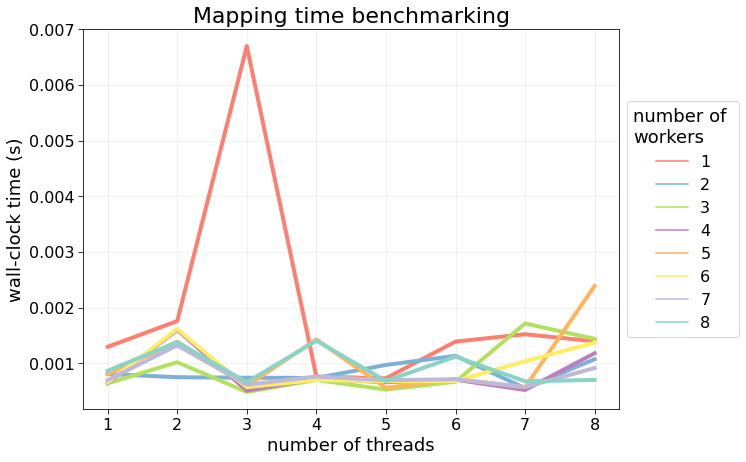

In [316]:
fig = plt.figure(figsize=(12,7))

ax = fig.add_subplot(1, 1, 1)
ax.grid(color = "black", alpha = 0.07)

sns.lineplot(
    data = df,
    x         = "n_threads",
    y         = "mapping_time",
    hue       = "n_workers",
    palette   = colors,
    linewidth = 4,
    ax        = ax,
    legend    = "full",
)
ax.set_title("Mapping time benchmarking", fontsize = fontsize + 4)
ax.set_xlabel("number of threads", fontsize = fontsize)
ax.set_ylabel("wall-clock time (s)", fontsize = fontsize)
ax.tick_params(axis = "both", which = "major", labelsize = fontsize - 2, length=5)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(title="number of \nworkers",loc="center left", bbox_to_anchor=(1, 0.5), fontsize = fontsize-2, title_fontsize=fontsize)


fig.savefig("plots/trends/mapping_time_wtp_ttrend.png", facecolor="white", dpi=300)
plt.show()

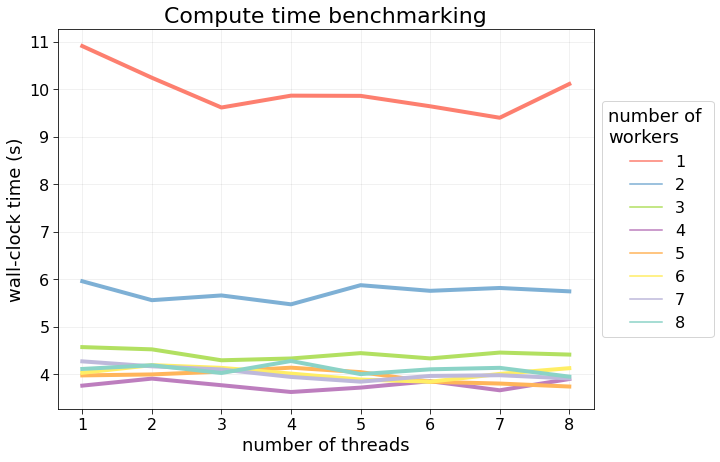

In [317]:
fig = plt.figure(figsize=(12,7))

ax = fig.add_subplot(1, 1, 1)
ax.grid(color = "black", alpha = 0.07)

sns.lineplot(
    data = df,
    x         = "n_threads",
    y         = "compute_time",
    hue       = "n_workers",
    palette   = colors,
    linewidth = 4,
    ax        = ax,
    legend    = "full",
)
ax.set_title("Compute time benchmarking", fontsize = fontsize + 4)
ax.set_xlabel("number of threads", fontsize = fontsize)
ax.set_ylabel("wall-clock time (s)", fontsize = fontsize)
ax.tick_params(axis = "both", which = "major", labelsize = fontsize - 2, length=5)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(title="number of \nworkers",loc="center left", bbox_to_anchor=(1, 0.5), fontsize = fontsize-2, title_fontsize=fontsize)


fig.savefig("plots/trends/compute_time_wtp_ttrend.png", facecolor="white", dpi=300)
plt.show()

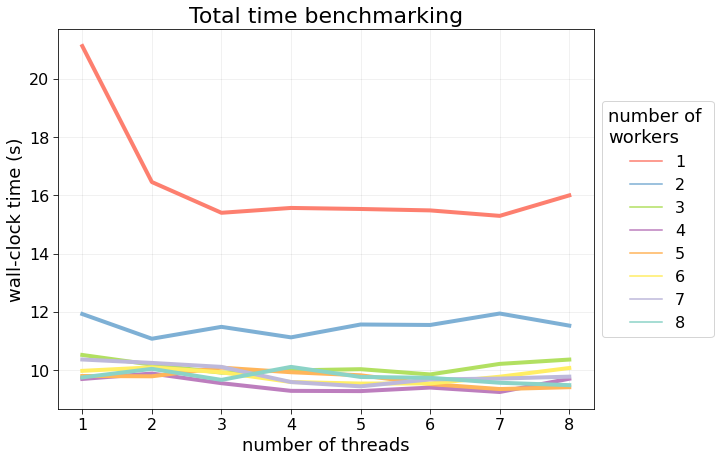

In [318]:
fig = plt.figure(figsize=(12,7))

ax = fig.add_subplot(1, 1, 1)
ax.grid(color = "black", alpha = 0.07)

sns.lineplot(
    data = df,
    x         = "n_threads",
    y         = "total_time",
    hue       = "n_workers",
    palette   = colors,
    linewidth = 4,
    ax        = ax,
    legend    = "full",
)
ax.set_title("Total time benchmarking", fontsize = fontsize + 4)
ax.set_xlabel("number of threads", fontsize = fontsize)
ax.set_ylabel("wall-clock time (s)", fontsize = fontsize)
ax.tick_params(axis = "both", which = "major", labelsize = fontsize - 2, length=5)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(title="number of \nworkers",loc="center left", bbox_to_anchor=(1, 0.5), fontsize = fontsize-2, title_fontsize=fontsize)


fig.savefig("plots/trends/total_time_wtp_ttrend.png", facecolor="white", dpi=300)
plt.show()

### Time vs workers

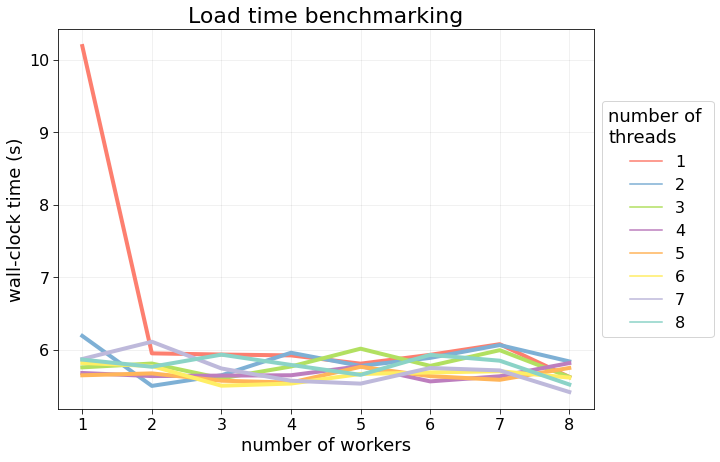

In [319]:
fig = plt.figure(figsize=(12,7))

ax = fig.add_subplot(1, 1, 1)
ax.grid(color = "black", alpha = 0.07)

sns.lineplot(
    data = df,
    x         = "n_workers",
    y         = "load_time",
    hue       = "n_threads",
    palette   = colors,
    linewidth = 4,
    ax        = ax,
    legend    = "full",
)
ax.set_title("Load time benchmarking", fontsize = fontsize + 4)
ax.set_xlabel("number of workers", fontsize = fontsize)
ax.set_ylabel("wall-clock time (s)", fontsize = fontsize)
ax.tick_params(axis = "both", which = "major", labelsize = fontsize - 2, length=5)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(title="number of \nthreads",loc="center left", bbox_to_anchor=(1, 0.5), fontsize = fontsize-2, title_fontsize=fontsize)


fig.savefig("plots/trends/load_time_wtp_wtrend.png", facecolor="white", dpi=300)
plt.show()

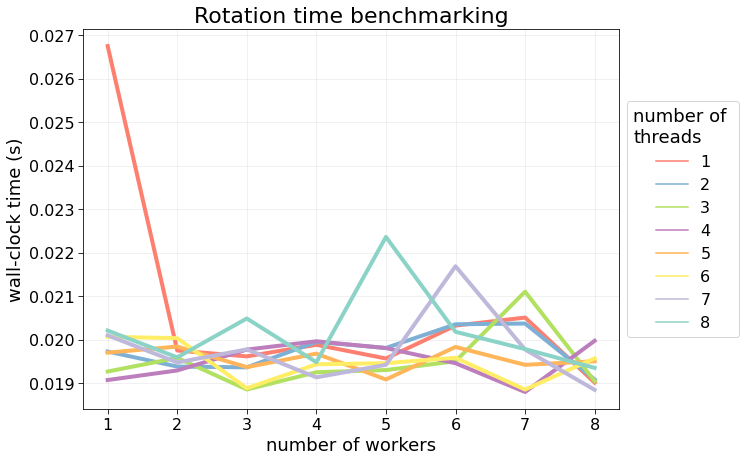

In [320]:
fig = plt.figure(figsize=(12,7))

ax = fig.add_subplot(1, 1, 1)
ax.grid(color = "black", alpha = 0.07)

sns.lineplot(
    data = df,
    x         = "n_workers",
    y         = "rotation_time",
    hue       = "n_threads",
    palette   = colors,
    linewidth = 4,
    ax        = ax,
    legend    = "full",
)
ax.set_title("Rotation time benchmarking", fontsize = fontsize + 4)
ax.set_xlabel("number of workers", fontsize = fontsize)
ax.set_ylabel("wall-clock time (s)", fontsize = fontsize)
ax.tick_params(axis = "both", which = "major", labelsize = fontsize - 2, length=5)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(title="number of \nthreads",loc="center left", bbox_to_anchor=(1, 0.5), fontsize = fontsize-2, title_fontsize=fontsize)


fig.savefig("plots/trends/rotation_time_wtp_wtrend.png", facecolor="white", dpi=300)
plt.show()

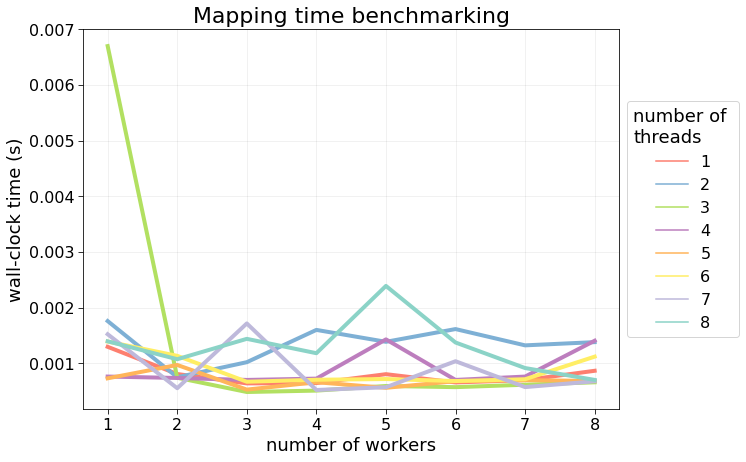

In [321]:
fig = plt.figure(figsize=(12,7))

ax = fig.add_subplot(1, 1, 1)
ax.grid(color = "black", alpha = 0.07)

sns.lineplot(
    data = df,
    x         = "n_workers",
    y         = "mapping_time",
    hue       = "n_threads",
    palette   = colors,
    linewidth = 4,
    ax        = ax,
    legend    = "full",
)
ax.set_title("Mapping time benchmarking", fontsize = fontsize + 4)
ax.set_xlabel("number of workers", fontsize = fontsize)
ax.set_ylabel("wall-clock time (s)", fontsize = fontsize)
ax.tick_params(axis = "both", which = "major", labelsize = fontsize - 2, length=5)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(title="number of \nthreads",loc="center left", bbox_to_anchor=(1, 0.5), fontsize = fontsize-2, title_fontsize=fontsize)


fig.savefig("plots/trends/mapping_time_wtp_wtrend.png", facecolor="white", dpi=300)
plt.show()

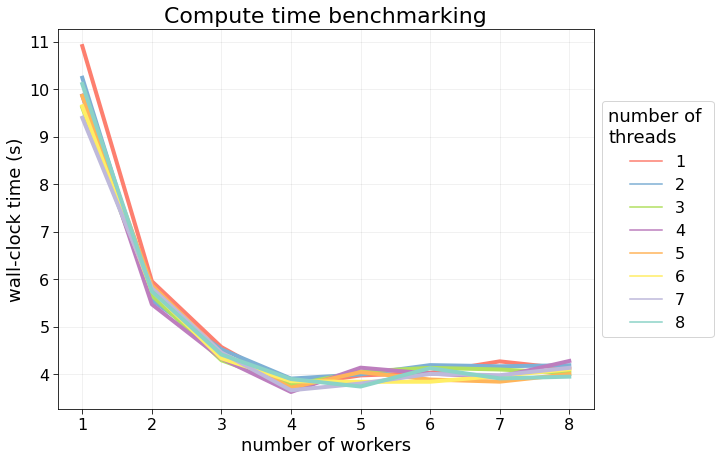

In [322]:
fig = plt.figure(figsize=(12,7))

ax = fig.add_subplot(1, 1, 1)
ax.grid(color = "black", alpha = 0.07)

sns.lineplot(
    data = df,
    x         = "n_workers",
    y         = "compute_time",
    hue       = "n_threads",
    palette   = colors,
    linewidth = 4,
    ax        = ax,
    legend    = "full",
)
ax.set_title("Compute time benchmarking", fontsize = fontsize + 4)
ax.set_xlabel("number of workers", fontsize = fontsize)
ax.set_ylabel("wall-clock time (s)", fontsize = fontsize)
ax.tick_params(axis = "both", which = "major", labelsize = fontsize - 2, length=5)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(title="number of \nthreads",loc="center left", bbox_to_anchor=(1, 0.5), fontsize = fontsize-2, title_fontsize=fontsize)


fig.savefig("plots/trends/compute_time_wtp_wtrend.png", facecolor="white", dpi=300)
plt.show()

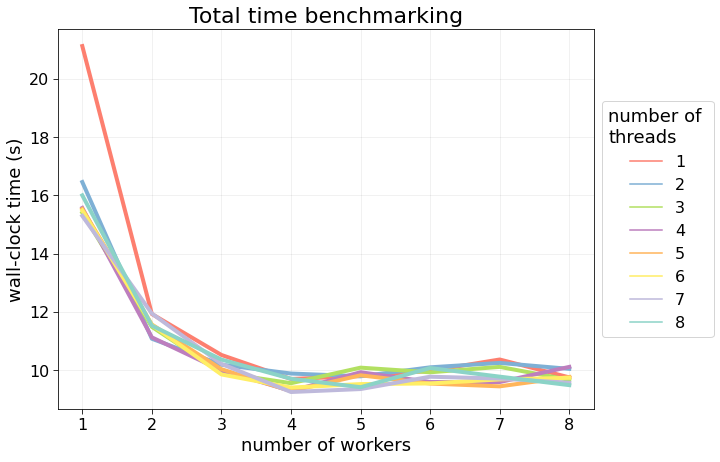

In [323]:
fig = plt.figure(figsize=(12,7))

ax = fig.add_subplot(1, 1, 1)
ax.grid(color = "black", alpha = 0.07)

sns.lineplot(
    data = df,
    x         = "n_workers",
    y         = "total_time",
    hue       = "n_threads",
    palette   = colors,
    linewidth = 4,
    ax        = ax,
    legend    = "full",
)
ax.set_title("Total time benchmarking", fontsize = fontsize + 4)
ax.set_xlabel("number of workers", fontsize = fontsize)
ax.set_ylabel("wall-clock time (s)", fontsize = fontsize)
ax.tick_params(axis = "both", which = "major", labelsize = fontsize - 2, length=5)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(title="number of \nthreads",loc="center left", bbox_to_anchor=(1, 0.5), fontsize = fontsize-2, title_fontsize=fontsize)


fig.savefig("plots/trends/total_time_wtp_wtrend.png", facecolor="white", dpi=300)
plt.show()